<a href="https://colab.research.google.com/github/AyushTyagi2/EvoDist/blob/main/Evodist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-24-0ef6b8bf4b77>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.fillna(dataset.iloc[:, 5:].mean(), inplace=True)


RMSE: 0.007684144098364271
R² Score: 0.9564459337740957


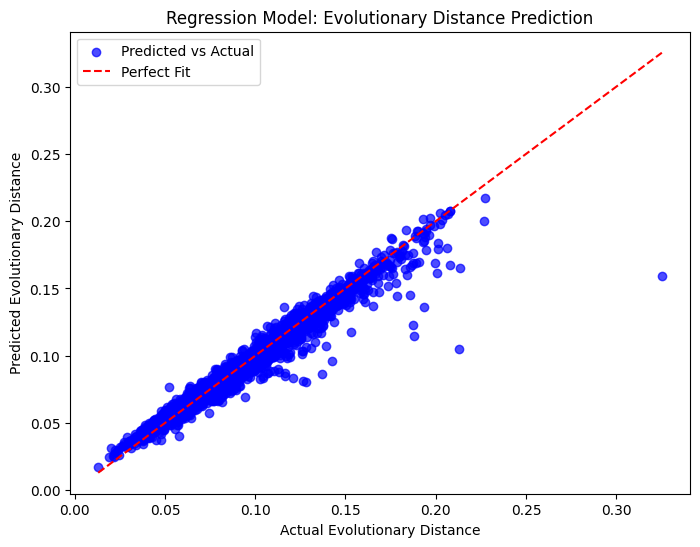

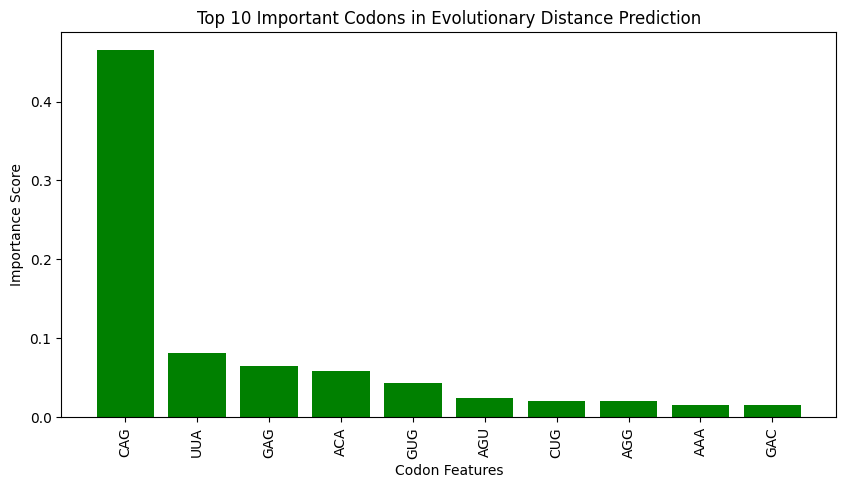

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset with explicit dtype handling
dataset = pd.read_csv("codon_usage.csv", dtype=str, low_memory=False)

# Convert numeric columns explicitly
dataset.iloc[:, 5:] = dataset.iloc[:, 5:].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with column mean
dataset.fillna(dataset.iloc[:, 5:].mean(), inplace=True)

# Set species name as index
species_codon_data = dataset.set_index('SpeciesName').iloc[:, 5:]

# Define Homo sapiens as the reference species
reference_species = "Homo sapiens"
if reference_species not in species_codon_data.index:
    raise ValueError(f"{reference_species} not found in dataset.")

reference_vector = species_codon_data.loc[reference_species].values

# Compute Euclidean distance for each species from Homo sapiens
distances = species_codon_data.apply(lambda row: euclidean(row.values, reference_vector), axis=1)

# Prepare dataset for regression
X = species_codon_data.drop(index=reference_species)  # Remove Homo sapiens itself
y = distances.drop(index=reference_species)  # Corresponding distances

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train Random Forest Regression model
regressor = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=0, n_jobs=-1)
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Plot: Actual vs Predicted Distances
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label="Perfect Fit")
plt.xlabel("Actual Evolutionary Distance")
plt.ylabel("Predicted Evolutionary Distance")
plt.title("Regression Model: Evolutionary Distance Prediction")
plt.legend()
plt.show()

# Feature Importance Bar Chart
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': regressor.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='g')
plt.xticks(rotation=90)
plt.xlabel("Codon Features")
plt.ylabel("Importance Score")
plt.title("Top 10 Important Codons in Evolutionary Distance Prediction")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean

# Load dataset with dtype specification to handle mixed types
dataset = pd.read_csv("codon_usage.csv", dtype=str, low_memory=False)

# Convert numeric columns explicitly
for col in dataset.columns[5:]:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Fill NaN values with column mean
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)

# Set species name as index
species_codon_data = dataset.set_index('SpeciesName').iloc[:, 5:]

# Function to compute evolutionary distance
def evolutionary_distance(species1, species2):
    if species1 not in species_codon_data.index or species2 not in species_codon_data.index:
        return "Error: One or both species not found in dataset."

    vec1 = species_codon_data.loc[species1].values.astype(float)
    vec2 = species_codon_data.loc[species2].values.astype(float)

    distance = euclidean(vec1, vec2)
    return f"Evolutionary Distance between {species1} and {species2}: {distance}"

# Example usage
species_1 = "Homo sapiens"
species_2 = "Rattus norvegicus"
print(evolutionary_distance(species_1, species_2))


Evolutionary Distance between Homo sapiens and Rattus norvegicus: 0.010180152258193392
